In [19]:
import numpy as np
import tensorflow as tf
import pathlib

In [20]:
data_dir = tf.keras.utils.get_file(
    origin="http://mireu-server.iptime.org:8000/list/HDD1/hana/Garbage_Images.tar.gz",
    fname="Garbage_Images",
    untar=True
)

img_list = pathlib.Path(data_dir)
image_count = len(list(img_list.glob('*/*.jpg')))
images_categories = ['metal', 'glass', 'paper', 'trash', 'cardboard', 'plastic']

In [21]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(512, 384),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(512, 384),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [ ]:
def ai_models():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(512, 384, 3)),
        tf.keras.layers.MaxPooling2D(pool_size=2),

        tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=2),

        tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=2),

        tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=2),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(64, activation='relu'),

        tf.keras.layers.Dense(len(images_categories), activation='softmax')
    ])
    # model.compile(loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['acc'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [ ]:
# 새로운 모델 객체를 만들고 훈련합니다
model = ai_models()

model.fit(train_generator, validation_data=validation_generator, epochs=50)

# SavedModel로 전체 모델을 저장합니다
model.save('Data/ai_models')

In [ ]:
os.listdir(cp_callback)

In [16]:
com_models = tf.keras.models.load_model('Data/ai_models')

com_models.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 384, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 192, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 192, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 96, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 96, 32)       18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 48, 32)       0

In [22]:
com_models.evaluate(validation_generator, verbose=2)

2022-03-31 08:55:36.876410: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 402653184 exceeds 10% of free system memory.
2022-03-31 08:55:38.083808: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 402653184 exceeds 10% of free system memory.
2022-03-31 08:55:39.262382: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 402653184 exceeds 10% of free system memory.
2022-03-31 08:55:40.427730: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 402653184 exceeds 10% of free system memory.
2022-03-31 08:55:41.592940: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 402653184 exceeds 10% of free system memory.


16/16 - 19s - loss: 1.0114 - acc: 0.6494 - 19s/epoch - 1s/step


[1.011422872543335, 0.649402379989624]

In [24]:
img=tf.keras.preprocessing.image.load_img("1.png", target_size=(512, 384))

x=tf.keras.preprocessing.image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = com_models.predict(images, batch_size=10)

In [27]:
images_categories
classes

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 2.7483404e-31,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

TypeError: 'History' object is not subscriptable

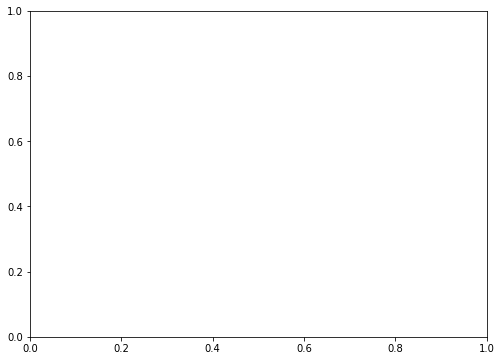

In [26]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(18, 6))

# 에포크별 정확도
pyplot.subplot(1,2,1)
pyplot.plot(com_models.history["acc"], label="accuracy")
pyplot.plot(com_models.history["val_acc"], label="val_accuracy")
pyplot.title("accuracy")
pyplot.legend()

# 에포크별 손실률
pyplot.subplot(1,2,2)
pyplot.plot(com_models.history["loss"], label="loss")
pyplot.plot(com_models.history["val_loss"], label="val_loss")
pyplot.title("loss")
pyplot.legend()

pyplot.show()